In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn

In [2]:
# Define Euclidean distance function
def euclidean_distance(p1, p2):
  """Calculates the Euclidean distance between two points."""
  return np.sqrt(np.sum((p1 - p2) ** 2))

In [3]:
# KNN function for prediction
def predict_knn(X_train, y_train, X_test, k):
  """Predicts class labels for test data using KNN."""
  predicted_label = []
  for test_instance in X_test:
    distances = [euclidean_distance(test_instance, train_instance) for train_instance in X_train]
    nearest_neighbors = np.argsort(distances)[:k]
    neighbor_labels = y_train[nearest_neighbors]
    prediction = np.argmax(np.bincount(neighbor_labels))
    predicted_label.append(prediction)
  return predicted_label

In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

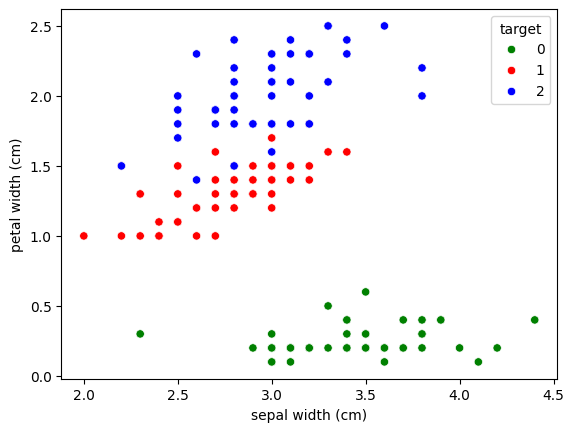

In [5]:
#represent the data graphyically
df_iris = pd.DataFrame(iris['data'],columns = iris['feature_names'])
df_iris

df_iris['target'] = iris['target']
df_iris

g =sn.scatterplot(x="sepal width (cm)",y="petal width (cm)",
              hue="target",
              data=df_iris,palette=['green','red','blue'])

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# KNN prediction from scratch
k = 7 # Number of neighbors
y_pred_knn = predict_knn(X_train, y_train, X_test, k)

In [8]:
# KNN prediction using scikit-learn
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)
y_pred_sklearn = knn_clf.predict(X_test)


In [9]:
# Evaluate accuracy for both methods
knn_accuracy = accuracy_score(y_test, y_pred_knn)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

print(f"KNN (from scratch) Accuracy (k={k}):", knn_accuracy)
print(f"scikit-learn KNN Accuracy (k={k}):", sklearn_accuracy)

KNN (from scratch) Accuracy (k=7): 0.9666666666666667
scikit-learn KNN Accuracy (k=7): 0.9666666666666667
